# DIP ASSIGNMENT 4

# By Sravanth Chowdary Potluri CS20B1006


In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# reading the image
img = cv2.imread('PISA.jpg')

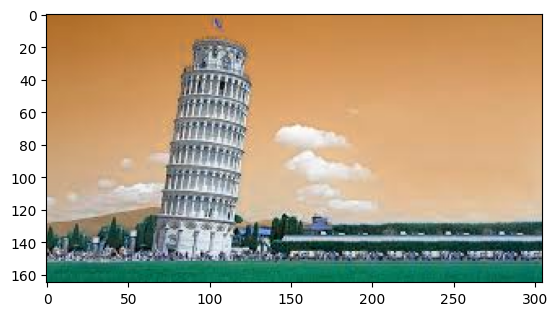

In [3]:
# displaying the image
plt.imshow(img)

In [4]:
# converting the image from bgr to rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

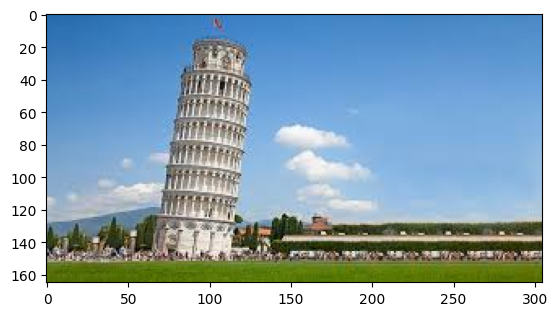

In [5]:
# displaying the image
plt.imshow(img)

In [6]:
# function to rotate the image using cv2

def rotate_image(image, angle):
    image = np.array(image)
    height, width = image.shape[:2]
    center = (width // 2, height // 2)

    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, (width, height), flags=cv2.INTER_LINEAR,
                            borderMode=cv2.BORDER_REPLICATE)
    return result


In [26]:
# rotating the image by 10 degrees
rotated = rotate_image(img,10)

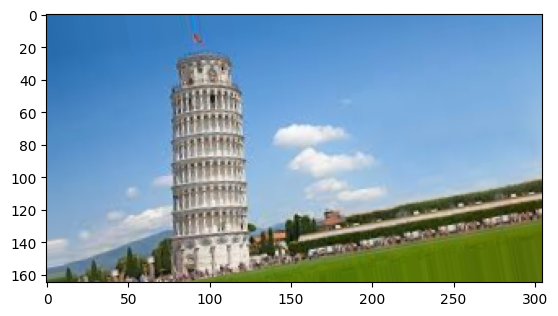

In [27]:
# displaying the rotated image
plt.imshow(rotated)

In [9]:
# user defined function to rotate the image using bilinear interpolation

def rotate_image_user(image, angle):
    # converting the image to radians
    angle = angle * np.pi / 180
    # getting the shape of the image
    height, width = image.shape[:2]
    # calculating the diagonal of the image
    diagonal = np.sqrt(height ** 2 + width ** 2)
    # calculating the padding for the image
    pad = np.ceil(diagonal - np.array([height, width])).astype('int') // 2
    # padding the image
    image = np.pad(image, ((pad[0], pad[0]), (pad[1], pad[1]), (0, 0)), mode='constant')

    # getting the shape of the padded image
    height, width = image.shape[:2]
    # calculating the center of the image
    center = (width // 2, height // 2)
    # creating an empty array of the same shape as the padded image
    result = np.zeros_like(image)
    # looping through the image
    for i in range(height):
        for j in range(width):
            # calculating the distance between the center and the current pixel
            dist = np.sqrt((center[0] - j) ** 2 + (center[1] - i) ** 2)
            # calculating the angle between the center and the current pixel
            ang = np.arctan2(i - center[1], j - center[0])
            # calculating the new angle
            new_ang = ang - angle
            # calculating the new position of the pixel
            new_x = int(center[0] + dist * np.cos(new_ang))
            new_y = int(center[1] + dist * np.sin(new_ang))
            # checking if the new position of the pixel is within the bounds of the image
            if (0 <= new_x < width) and (0 <= new_y < height):
                # assigning the pixel to the new position
                result[i, j] = image[new_y, new_x]
    # removing the padding from the image
    result = result[pad[0]:-pad[0] or None, pad[1]:-pad[1] or None]
    return result

In [28]:
# rotating the image by 10 degrees
rotated_user = rotate_image_user(img,-10)

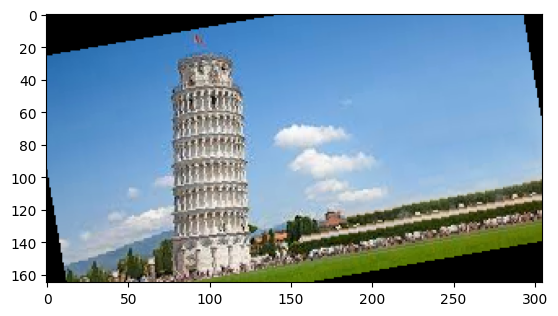

In [29]:
# displaying the rotated image
plt.imshow(rotated_user)

#### by using trail and error method and by playing with the values of angle we can estimate the angle of declination of the leaning tower of pisa from the vertical as 9 degrees